In [288]:
import pandas as pd
import numpy as np

In [289]:
dataset = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [290]:
x = dataset.iloc[:, 2:12]
y = dataset.iloc[:, 1]
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [291]:
x.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [292]:
x = x.drop(columns = ['Name', 'Ticket', 'Cabin'])
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.00,1,0,7.25,S
1,1,female,38.00,1,0,71.28,C
2,3,female,26.00,0,0,7.92,S
3,1,female,35.00,1,0,53.10,S
4,3,male,35.00,0,0,8.05,S


In [293]:
x.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

## Imputing missing values 

In [294]:
from sklearn.impute import SimpleImputer
age_imputer = SimpleImputer(strategy = 'mean')
age_imputer.fit(x[['Age']])
x['Age'] = age_imputer.transform(x[['Age']])

embraked_imputer = SimpleImputer(strategy = 'most_frequent')
embraked_imputer.fit(x[['Embarked']])
x['Embarked'] = embraked_imputer.transform(x[['Embarked']])

x.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Visualizing relations 

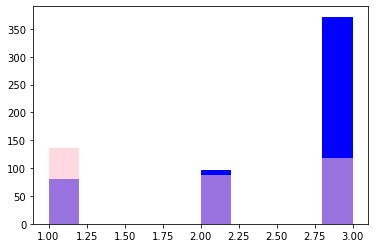

In [295]:
import matplotlib.pyplot as plt
plt.hist(x['Pclass'][y == 0], label = "y = 0", color = 'blue', stacked = True)
plt.hist(x['Pclass'][y == 1], label = "y = 1", color = 'pink', stacked = True, alpha = 0.6)
plt.show()

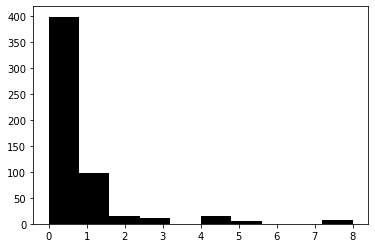

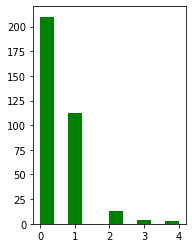

In [296]:
plt.subplot(1,1, 1)
plt.hist(x['SibSp'][y == 0], color = 'black')
plt.show()

plt.subplot(1, 2, 2)
plt.hist(x['SibSp'][y == 1], color = 'green')
plt.show()

## Geting dummy variables 

In [297]:
print(x.head())
x = pd.get_dummies(x, columns = ['Embarked'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Sex'] = le.fit_transform(x['Sex'])

   Pclass     Sex   Age  SibSp  Parch  Fare Embarked
0       3    male 22.00      1      0  7.25        S
1       1  female 38.00      1      0 71.28        C
2       3  female 26.00      0      0  7.92        S
3       1  female 35.00      1      0 53.10        S
4       3    male 35.00      0      0  8.05        S


 ## Droping Embraked  

In [298]:
#x = x.drop(columns = ['Embarked'])

In [299]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.00,1,0,7.25,0,0,1
1,1,0,38.00,1,0,71.28,1,0,0
2,3,0,26.00,0,0,7.92,0,0,1
3,1,0,35.00,1,0,53.10,0,0,1
4,3,1,35.00,0,0,8.05,0,0,1


In [300]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [301]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.2)

In [302]:
print(x_test)

[[ 0.82737724  0.73769513  0.40792596 ... -0.48204268 -0.30756234
   0.61583843]
 [ 0.82737724  0.73769513 -0.7463893  ... -0.48204268 -0.30756234
   0.61583843]
 [ 0.82737724  0.73769513 -0.2846632  ... -0.48204268 -0.30756234
   0.61583843]
 ...
 [ 0.82737724  0.73769513  1.10051512 ... -0.48204268 -0.30756234
   0.61583843]
 [ 0.82737724  0.73769513  2.25483038 ... -0.48204268 -0.30756234
   0.61583843]
 [-1.56610693  0.73769513  0.         ...  2.0745051  -0.30756234
  -1.62380254]]


In [303]:
from lazypredict.Supervised import LazyClassifier
lazy_classifier = LazyClassifier(verbose = 0, ignore_warnings = True)
model, prediction = lazy_classifier.fit(x_train, x_test, y_train, y_test)
model

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.75it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.84,0.83,0.83,0.84,0.28
LGBMClassifier,0.84,0.82,0.82,0.84,0.09
RandomForestClassifier,0.83,0.81,0.81,0.83,0.27
SVC,0.84,0.81,0.81,0.84,0.03
BaggingClassifier,0.83,0.81,0.81,0.83,0.06
CalibratedClassifierCV,0.83,0.80,0.80,0.83,0.15
XGBClassifier,0.82,0.80,0.80,0.82,0.08
BernoulliNB,0.83,0.80,0.80,0.82,0.02
LogisticRegression,0.82,0.80,0.80,0.82,0.01


In [304]:
print(y_test)

590    0
131    0
628    0
195    1
230    1
      ..
456    0
191    0
603    0
94     0
766    0
Name: Survived, Length: 179, dtype: int64


## XGBoost

In [305]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print(y_pred)

[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1
 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0]


In [306]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[101  16]
 [ 16  46]]


0.8212290502793296

## k fold cross validation 

In [307]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = xgb, X = x, y = y, cv = 10)
print("accuracy : {:.2f} %".format(accuracy.mean()*100))
print("standerd deviation: {:.2f} %".format(accuracy.std()*100))
print("CV : ",accuracy.mean()/accuracy.std())

accuracy : 80.92 %
standerd deviation: 3.88 %
CV :  20.86073392169493


## Random forrest 

In [343]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(criterion = 'gini', 
                             max_depth = 7, 
                             min_samples_split = 3, 
                             n_estimators = 20, 
                             min_samples_leaf = 3)
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
print(y_pred)

[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0]


In [338]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [10, 15, 20, 25, 30, 35, 40, 45],
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : [1, 2, 3, 4],
    'max_depth' : [5, 6, 7, 8, 10, 15, 'None'],
    'min_samples_leaf' : [1, 2.5, 2.8, 3, 4]
}
grid_search = GridSearchCV(estimator = cls,
                           cv = 10,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('best accuracy: {:.2f} %'.format(best_accuracy*100))
print("best parameters : ", best_parameters)

best accuracy: 83.43 %
best parameters :  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


In [345]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[106  11]
 [ 15  47]]


0.8547486033519553

In [346]:
accuracy = cross_val_score(estimator = cls, X = x, y = y, cv = 10)
print("accuracy : {:.2f} %".format(accuracy.mean()*100))
print("standerd deviation : {:.2f} %".format(accuracy.std()*100))
print("CV : ", accuracy.mean()/accuracy.std())

accuracy : 83.51 %
standerd deviation : 5.39 %
CV :  15.504371784572134


## Training On Whole dataset 

In [347]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'gini', 
                                    max_depth = 7, 
                                    min_samples_split = 3, 
                                    n_estimators = 20, 
                                    min_samples_leaf = 3)
classifier.fit(x, y)

RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=20)

# Test 

In [312]:
original_test = test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [313]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [314]:
test = test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [315]:
test['Age'] = age_imputer.transform(test[['Age']])

test['Fare'] = fare_imputer.transform(test[['Fare']])

test['Embarked'] = embraked_imputer.transform(test[['Embarked']])


test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [316]:
print(test.head())
test = pd.get_dummies(test, columns = ['Embarked'])
test['Sex'] = le.fit_transform(test['Sex'])

   Pclass     Sex   Age  SibSp  Parch  Fare Embarked
0       3    male 34.50      0      0  7.83        Q
1       3  female 47.00      1      0  7.00        S
2       2    male 62.00      0      0  9.69        Q
3       3    male 27.00      0      0  8.66        S
4       3  female 22.00      1      1 12.29        S


In [317]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.50,0,0,7.83,0,1,0
1,3,0,47.00,1,0,7.00,0,0,1
2,2,1,62.00,0,0,9.69,0,1,0
3,3,1,27.00,0,0,8.66,0,0,1
4,3,0,22.00,1,1,12.29,0,0,1


In [318]:
test = sc.transform(test)

## Predicting Submission

In [348]:
submit = classifier.predict(test)

In [349]:
submission = pd.DataFrame()
submission['PassengerId'] = original_test['PassengerId']
submission['Survived'] = submit

In [350]:
submission.to_csv('Titanic Prediction Submission4.csv', index = False)
print('file saved')

file saved
